<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Lab_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Arboles de Decisión con Python**

En este lab, construiremos un clasificador mediante un árbol de decisión para predecir la seguridad de un auto. Construiremos dos modelos, uno con criterio `índice de Gini` y otro con criterio `entropía`. Ambos utilizan la librería Scikit-Learn.

#Como trabaja un árbol de decisión

Los árboles de decisión constituyen uno de los algoritmos de aprendizaje automático supervisado más utilizados para tareas de clasificación. La intuición detrás del algoritmo del árbol de decisión es muy sencilla de entender.
-


1. Para cada atributo del conjunto de datos, el algoritmo forma un nodo. El atributo más importante se coloca en el nodo raíz.

2. Para evaluar la tarea en cuestión, comenzamos en el nodo raíz y avanzamos hacia abajo en el árbol siguiendo el nodo correspondiente que cumple con nuestra condición o decisión.

3. Este proceso continúa hasta llegar a un nodo hoja. Contiene la predicción o el resultado del Árbol de Decisión.


#Medidas de selección de atributos

Básicamente existen dos medidas para la selección de atributos:-


- **Ganancia de Información**

- **Indice Gini**



##Ganancia de Información


Utilizando la ganancia de información como criterio, intentamos estimar la información contenida en cada atributo. Para comprender el concepto de ganancia de información, necesitamos conocer otro concepto llamado **Entropía**.

## **Entropía**
La entropía mide la impureza en el conjunto de datos dado. En Física y Matemáticas, la entropía se conoce como la aleatoriedad o incertidumbre de una variable aleatoria X. En teoría de la información, se refiere a la impureza en un grupo de ejemplos. **Ganancia de información** es la disminución de la entropía. La ganancia de información calcula la diferencia entre la entropía antes de la división y la entropía promedio después de la división del conjunto de datos en función de los valores de atributos dados.



![Entropía](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Aquí, **c** es el número de clases y **pi** es la probabilidad asociada con la iésima clase.

El algoritmo de árbol de decisión ID3 (dicotomizador iterativo) utiliza entropía para calcular la ganancia de información. Entonces, al calcular la disminución en la **medida de entropía** de cada atributo, podemos calcular su ganancia de información. El atributo con la mayor ganancia de información se elige como atributo de división en el nodo.

## Indice Gini

Otra medida de selección de atributos que utiliza **CART (árboles categóricos y de regresión)** es el **índice de Gini**. Utiliza el método Gini para crear puntos de división.



![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Aquí, nuevamente **c** es el número de clases y **pi** es la probabilidad asociada con la iésima clase.

El índice de Gini dice que si seleccionamos aleatoriamente dos elementos de una población, deben ser de la misma clase y la probabilidad de que esto suceda es 1 si la población es pura.

Funciona con la variable objetivo categórica "Éxito" o "Fracaso". Sólo realiza divisiones binarias. Cuanto mayor es el valor de Gini, mayor es la homogeneidad. CART (árbol de clasificación y regresión) utiliza el método Gini para crear divisiones binarias.

Pasos para calcular el Gini para una expansión

1. Calcule el Gini para los subnodos, utilizando la fórmula suma del cuadrado de la probabilidad de éxito y fracaso (p^2+q^2).

2. Calcule el Gini para la división utilizando la puntuación de Gini ponderada de cada nodo de esa división.


En el caso de un atributo de valor discreto, el subconjunto que proporciona el índice de Gini mínimo para el atributo elegido se selecciona como atributo de división. En el caso de atributos con valores contínuos, la estrategia es seleccionar cada par de valores adyacentes como un posible punto de división y elegir el punto con un índice de Gini más pequeño como punto de división. El atributo con índice de Gini mínimo se elige como atributo de división.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


# Importamos el dataset


In [ ]:
data = 'https://drive.google.com/uc?id=1Tjz8LpEt2OUTyd5CHIKW2KXYFnR5ROf-'

df = pd.read_csv(data, header=None)

In [ ]:
# 1- ver las dimensiones del dataset

df.shape

(1728, 7)

In [ ]:
# 2.- Ver las 5 primeras filas

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Cambiar el nombre de las columnas

Podemos ver que el conjunto de datos no tiene nombres de columna adecuados. Las columnas están simplemente etiquetadas como 0,1,2... y así sucesivamente. Deberíamos dar nombres propios a las columnas. Lo haremos de la siguiente manera:-

In [ ]:
col_names = ['precio', 'mantenim', 'puertas', 'personas', 'maletero', 'seguridad', 'Eval']
df.columns = col_names
col_names

['precio', 'mantenim', 'puertas', 'personas', 'maletero', 'seguridad', 'Eval']

## Significado de cada columna

*   precio: Precio del auto (Very High: vhigh, High: high, Low: low, Medium: med)  
* mantenim: Coste de mantenimiento (Very High: vhigh, High: high, Low: low, Medium: med)
* puertas: Número de puertas en el auto(2, 3, 4, and 5 or more)  
* personas: Capacidad en términos de personas (2, 4, and more)  
* maletero: Tamaño del maletero (small, med, big)  
* seguridad: Nivel de seguridad  del auto (high, med, low)  
* **(Variable Objetivo) Eval: Evaluación (Unacceptable, Acceptable, VeryGood, Good)**





In [ ]:
# 3.- veamos nuevamente las 5 primeras columnas
df.head()

,precio,mantenim,puertas,personas,maletero,seguridad,Eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# 4.- Obtengamos la información resumida del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio     1728 non-null   object
 1   mantenim   1728 non-null   object
 2   puertas    1728 non-null   object
 3   personas   1728 non-null   object
 4   maletero   1728 non-null   object
 5   seguridad  1728 non-null   object
 6   Eval       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### frecuencia de valores en las variables


In [ ]:
col_names = ['precio', 'mantenim', 'puertas', 'personas', 'maletero', 'seguridad', 'Eval']
for col in col_names:
    print(df[col].value_counts())


vhigh    432
high     432
med      432
low      432
Name: precio, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: mantenim, dtype: int64
2        432
3        432
4        432
5more    432
Name: puertas, dtype: int64
2       576
4       576
more    576
Name: personas, dtype: int64
small    576
med      576
big      576
Name: maletero, dtype: int64
low     576
med     576
high    576
Name: seguridad, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Eval, dtype: int64


### Exploremos la variable objetivo  **`Eval`**

In [ ]:
df['Eval'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Eval, dtype: int64

In [ ]:
# 5.- Miremos si hay valores nulos e
df.isnull().sum()

precio       0
mantenim     0
puertas      0
personas     0
maletero     0
seguridad    0
Eval         0
dtype: int64

# Declaremos el vector de características y variable de destino


In [ ]:
X = df.drop(['Eval'], axis=1)
y = df['Eval']

### Codifiquemos las variables categóricas


##Es necesario insralar la librería **category_encoders**

In [ ]:
!pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders

  Cloning https://github.com/scikit-learn-contrib/category_encoders to /tmp/pip-req-build-_mo2pwzx
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/category_encoders /tmp/pip-req-build-_mo2pwzx
  Resolved https://github.com/scikit-learn-contrib/category_encoders to commit 3d588f63bd78e1a1eb253258c093ace9322c79ec
  Preparing metadata (setup.py) ... done


In [ ]:
from category_encoders import *

In [ ]:
# codificamos las variables
encoder = OrdinalEncoder(cols=['precio', 'mantenim', 'puertas', 'personas', 'maletero', 'seguridad'])
X = encoder.fit_transform(X)

#Dividir los datos en conjuntos de prueba y entrenamiento separados

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
# 6.- Miremos las dimensiones de los dos conjuntos

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
X_train.head()

,precio,mantenim,puertas,personas,maletero,seguridad
48,1,1,2,3,2,1
468,2,1,2,2,1,1
155,1,2,2,3,1,3
1721,4,4,4,3,1,3
1208,3,4,1,3,1,3


In [ ]:
X_test.head()

,precio,mantenim,puertas,personas,maletero,seguridad
599,2,2,3,1,2,3
1201,3,4,1,2,2,2
628,2,2,4,1,3,2
1498,4,2,4,2,2,2
1263,3,4,3,3,2,1


##Arbol de desición Decision con índice Gini


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split= 10,random_state=0)
# instaciamos el modelo
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0)

### Exactitud del modelo

### Ahora, compararemos la precisión del conjunto de entrenamiento y de prueba para comprobar si hay sobreajuste.

In [ ]:
# Veamos la exactitud del modelo con ambos conjuntos de datos

print('Precisión conjunto de entrenamiento: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Precisión conjunto de prueva: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Precisión conjunto de entrenamiento: 0.7865
Precisión conjunto de prueva: 0.8021


 la  precisión del conjunto de entrenamiento es 0,7865, mientras que la precisión del conjunto de prueba es 0,8021. Estos dos valores son bastante comparables. Por tanto, no hay signos de sobreajuste.


### Visualización

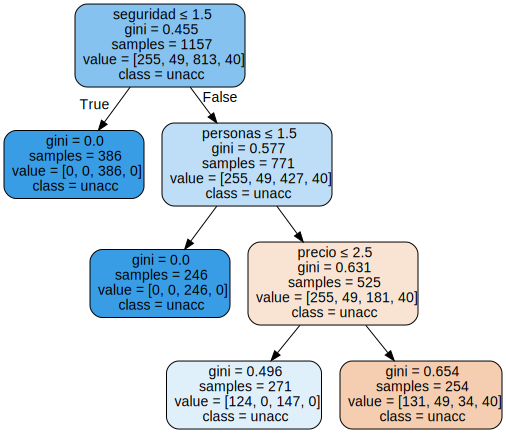

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

# **Matriz de Confusión**

Una matriz de confusión es una herramienta para resumir el desempeño de un algoritmo de clasificación. Una matriz de confusión nos dará una imagen clara del rendimiento del modelo de clasificación y los tipos de errores producidos por el modelo. Nos da un resumen de predicciones correctas e incorrectas desglosadas por cada categoría. El resumen se presenta en forma de tabla.


Son posibles cuatro tipos de resultados al evaluar el desempeño de un modelo de clasificación. Estos cuatro resultados se describen a continuación: -


**Verdaderos positivos (TP)**: los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación en realidad pertenece a esa clase.


**Verdaderos Negativos (TN)** – Los Verdaderos Negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.


**Falsos positivos (FP)**: los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se llama **Error tipo I.**



**Falsos negativos (FN)**: los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se llama **Error de tipo II.**



Estos cuatro resultados se resumen en una matriz de confusión que se proporciona a continuación.

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


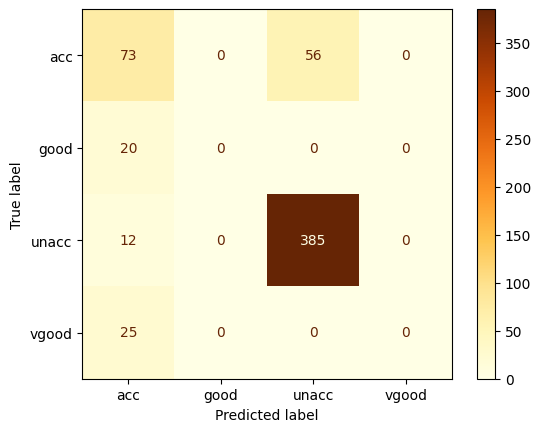

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_gini.classes_)
disp.plot(cmap="YlOrBr")
plt.show()

# **Tarea: Realizar el mismo modelo pero utilizando como criterio la Entropía**

